https://adventofcode.com/2022/day/14

In [1]:
import numpy as np
from itertools import product
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
def load_input(filename: str) -> list:
    with open(filename, 'r') as f:
        data = list(map(str.strip, f.readlines()))
    return data

def data_to_coords(data: str) -> tuple[tuple[int, int]]:
    coords = data.split(' -> ')
    return tuple([tuple([int(n) for n in s.split(',')]) for s in coords])

def rock_str(rock: np.ndarray) -> str:
    to_return = ''
    for row in rock.T:
        for i in row:
            match i:
                case 0: # empty
                    to_return += '.'
                case 1: # crack
                    to_return += '#'
                case 2: # sand
                    to_return += 'o'
        to_return += '\n'
    return to_return

def crack_coords(s: tuple[float, float],
                 e: tuple[float, float]) -> tuple[tuple[float, float]]:
    x_lims = s[0], e[0]
    y_lims = s[1], e[1]
    x_range = range(min(x_lims), max(x_lims)+1)
    y_range = range(min(y_lims), max(y_lims)+1)
    return tuple(product(x_range, y_range))
                    
def show(rock):
    clear_output(wait=True)
    plt.matshow(rock.T)
    plt.axis('off')
    plt.show()
    
def solve_part_1(filename):   
    data = load_input(filename)
    coords = list(map(data_to_coords, data))
    min_x, max_y = np.vstack(coords).min(axis=0)
    max_x, max_y = np.vstack(coords).max(axis=0)
    rock = np.zeros((max_x+2, max_y+1), dtype=int)
    for crack in coords:
        for s, e in zip(crack[:-1], crack[1:]):
            for c in crack_coords(s, e):
                rock[c] = 1
    grains = 0
    while True:
        grain = np.array([500,0])
        rock[tuple(grain)] = 2
        moves = [0,0,0]
        try:
            while np.any(moves := rock[tuple(grain[0] + np.array([0, -1, +1])),
                                       tuple([grain[1]+1]*3)] == 0):
                loc = tuple(grain[0] + np.array([0, -1, +1])), tuple([grain[1]+1]*3)
                rock[tuple(grain)] = 0
                if moves[0]: grain += np.array([0,1])
                elif moves[1]: grain += np.array([-1,1])
                elif moves[2]: grain += np.array([1,1])  
                else: raise ValueError
                rock[tuple(grain)] = 2
            show(rock[min_x-2:])
        except IndexError:
            break
        except:
            raise
        grains += 1
    return grains

def solve_part_2(filename):   
    data = load_input(filename)
    coords = list(map(data_to_coords, data))
    max_x, max_y = np.vstack(coords).max(axis=0)
    rock = np.zeros((500+max_y+3, max_y+3), dtype=int)
    for crack in coords:
        for s, e in zip(crack[:-1], crack[1:]):
            for c in crack_coords(s, e):
                rock[c] = 1
    rock[:,-1] = 1
    grains = 0
    while rock[500,0] == 0:
        grain = np.array([500,0])
        rock[tuple(grain)] = 2
        moves = [0,0,0]
        while np.any(moves := rock[tuple(grain[0] + np.array([0, -1, +1])),
                                   tuple([grain[1]+1]*3)] == 0):
            loc = tuple(grain[0] + np.array([0, -1, +1])), tuple([grain[1]+1]*3)
            rock[tuple(grain)] = 0
            if moves[0]: grain += np.array([0,1])
            elif moves[1]: grain += np.array([-1,1])
            elif moves[2]: grain += np.array([1,1])  
            else: raise ValueError
            rock[tuple(grain)] = 2        
        grains += 1
    show(rock[500-(max_y+2):])
    return grains

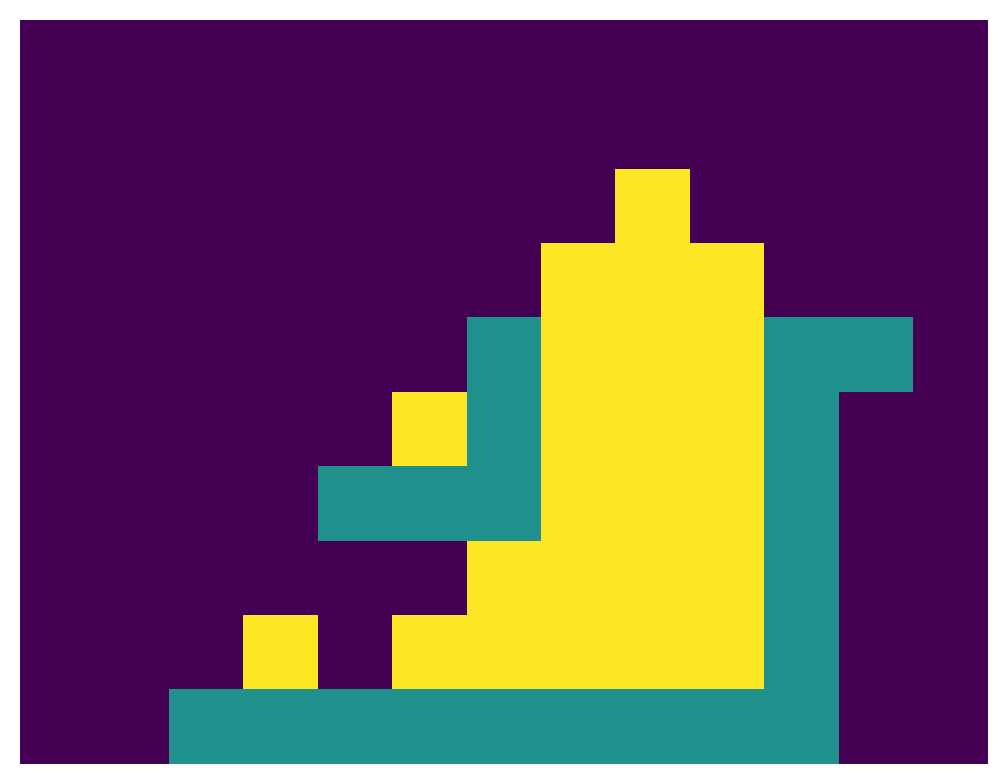

24

In [3]:
filename = "../example_data/day14_example_data.txt"
solve_part_1(filename)

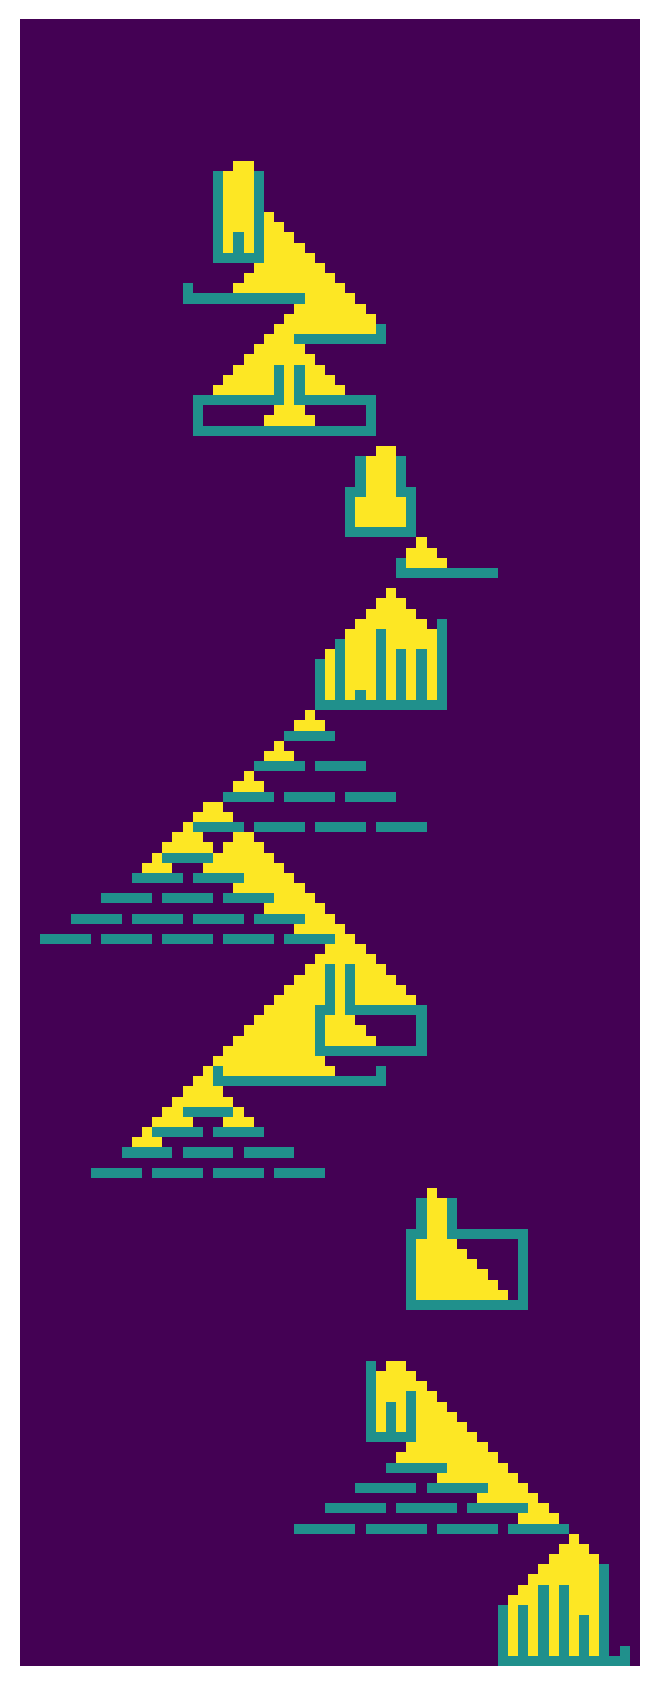

674

In [4]:
filename = "../data/day14_data.txt"
solve_part_1(filename)

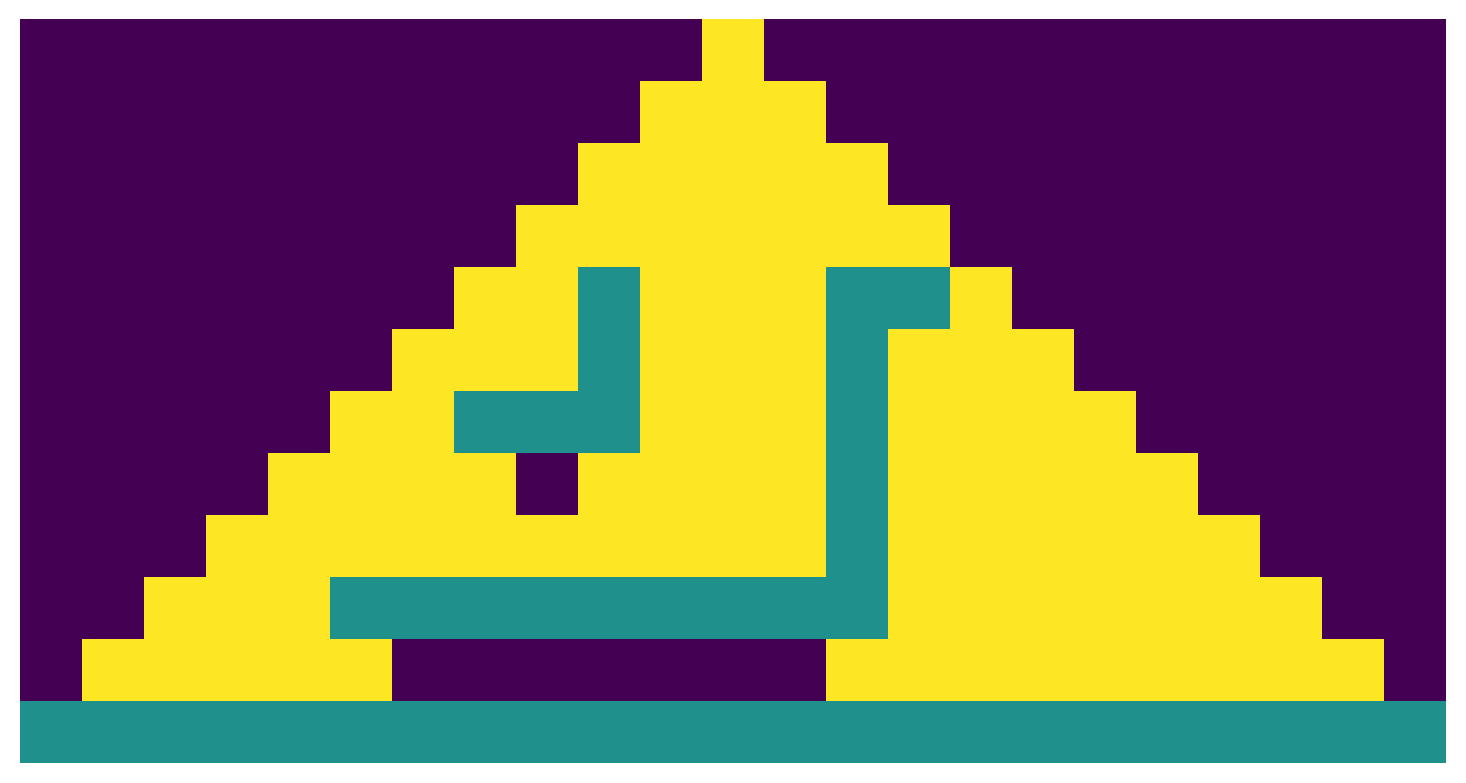

93

In [5]:
filename = "../example_data/day14_example_data.txt"
solve_part_2(filename)

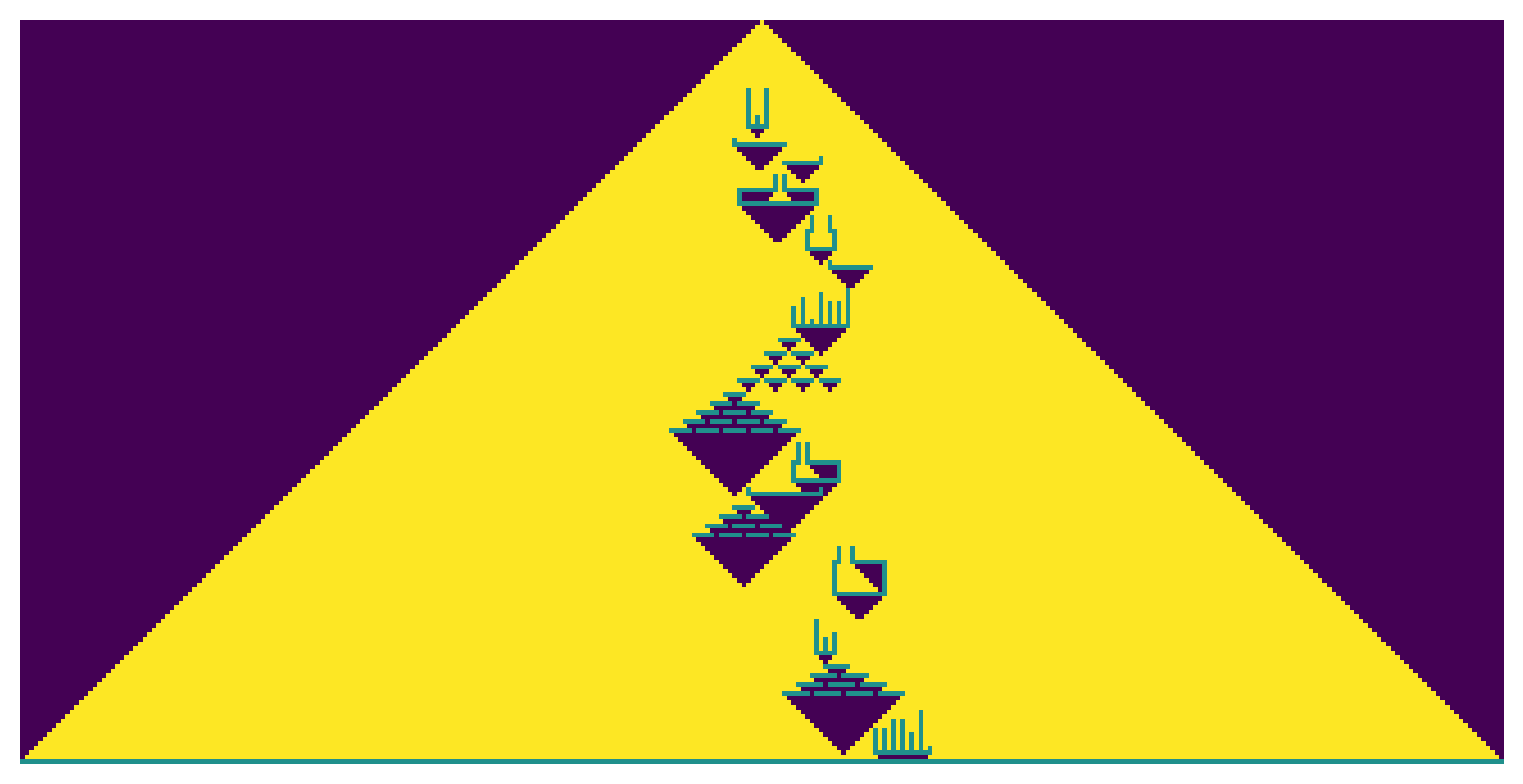

24958

In [6]:
filename = "../data/day14_data.txt"
solve_part_2(filename)